# Linear and Logistic Regression

In [1]:
%matplotlib inline

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

<strong>Linear Regressuion</strong> - used to predict continuous values (непрекъснати стойностти)

оценки {1, 2, 3, 4, 5} - променлива с total ordering - можем да я третираме като спектър -> може да се третира като класификационна задача, но и като регресия

<strong>Problem statement:</strong>

Given pairs of (𝑥;𝑦) points, create a model

Input 𝑥, output 𝑦; goal: predict 𝑦 given 𝑥

Under the assumption that 𝑦 depends linearly on 𝑥 (and nothing else)


<strong>Modelling function:</strong>

𝑦 ̃=𝑎𝑥+𝑏

Many samples: for each sample (𝑥_1,𝑦_1 ), …, (𝑥_𝑛, 𝑦_𝑛 ):

𝑦 ̃_𝑖=𝑎𝑥_𝑖+𝑏, 𝑖∈[1;𝑛]

Many variables: 𝑦 ̃=𝑎_1 𝑥_1+𝑎_2 𝑥_2+…+𝑎_𝑛 𝑥_𝑛+𝑏≡𝑎^𝑇 𝑋+𝑏

Trick: 𝑎_0≡𝑏;𝑥_0≡1⇒𝑦 ̃=𝑎_0.1+𝑎_1 𝑥_1+…+𝑎_𝑛 𝑥_𝑛=𝑎^𝑇 𝑥





<strong>Loss function</strong>

For each sample 𝑖, 𝑖∈[1,𝑚]

𝑑_𝑖=(𝑦 ̃_𝑖−𝑦_𝑖 )^2

<strong>Total cost function</strong>

Also called simply "cost function"

𝐽=1/𝑛 ∑_(𝑖=1)^𝑛(𝑦 ̃_𝑖−𝑦_𝑖 )^2 

𝐽 depends on 𝑎, 𝑏, 𝑥, 𝑦

<strong>Training process</strong>

Minimize the cost function

We're looking for parameters 𝑎,𝑏 that lead to min⁡𝐽

Written as arg⁡min┬(𝑎,𝑏)⁡𝐽⁡  


In [3]:
housing_data = pd.read_fwf("data/housing.data", header = None)

In [4]:
housing_data.columns = ["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance",  "highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]

In [5]:
housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
zoned_land,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
industry,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
bounds_river,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
nox_conc,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
rooms,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
age,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
distance,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
highways,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
tax,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [7]:
housing_data.dtypes

crime_rate      float64
zoned_land      float64
industry        float64
bounds_river      int64
nox_conc        float64
rooms           float64
age             float64
distance        float64
highways          int64
tax             float64
pt_ratio        float64
b_estimator     float64
pop_status      float64
price           float64
dtype: object

In [8]:
housing_attributes = housing_data.drop(columns = "price")

In [9]:
housing_attributes.shape

(506, 13)

In [10]:
housing_prices = housing_data.price

In [11]:
housing_prices.shape

(506,)

In [12]:
housing_prices.values.reshape(-1, 1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [13]:
#Preprocess the data
#1. Indicator variables
#има ли категорийни променливи
housing_attributes_with_dummies = pd.get_dummies(housing_attributes) #Конкретно за този дейтасет не ни трябват

#2.Normalization
#скалиране/нормализиране на данните
scaler = MinMaxScaler()
housing_attributes_scaled = scaler.fit_transform(housing_attributes_with_dummies)


In [14]:
#по колони
housing_attributes_scaled.min(axis = 0), housing_attributes_scaled.max(axis = 0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [15]:
# scaler.inverse_transform(housing_attributes_scaled) # като вземем трансформирани данни да ги върнем към оригиналните

In [16]:
#Test model
linear_regression = LinearRegression()

In [17]:
linear_regression.fit(housing_attributes_scaled, housing_prices)

LinearRegression()

In [18]:
linear_regression.coef_ # участието/влиянието на всяка една от променливите
#prediction = 2.0845 * crime_rate + 1.494 * zoned_land + ...
#колкото по голям е коефициента като апсолютна стойност 
#толкова по-важен е този параметър/променлива за модела

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

In [19]:
linear_regression.intercept_ # какво става ако всяка една от стойностите е 0

23.689291534676972

In [20]:
#не е много добра идея да се прави върху същите данни както тук(само за пример)
linear_regression.score(housing_attributes_scaled, housing_prices)

0.7198065414937174

In [21]:
predictions = linear_regression.predict(housing_attributes_scaled)
np.sqrt(mean_squared_error(housing_prices, predictions)) # толкова може да се сбърка за една оценка

4.86351800705635

In [22]:
# NEVER TEST ON THE TRAININF DATASET!

In [23]:
# Outliers # една точка лежи далече от другите

ransac = RANSACRegressor(
    base_estimator = LinearRegression(),
    max_trials = 200,
    min_samples = 0.5,
    stop_score = 0.9
)

In [24]:
ransac.fit(housing_attributes_scaled, housing_prices)

C:\Users\stoic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                max_trials=200, min_samples=0.5, stop_score=0.9)

In [25]:
ransac.estimator_.coef_

array([  0.21076087,  -0.04564312,   0.50562091,   3.4702062 ,
        -4.18616994,  27.91216376,  -1.2094479 ,  -6.40597699,
         0.63188815,  -1.92404145,  -7.43385069,   4.2666461 ,
       -15.99082797])

In [26]:
ransac.inlier_mask_.sum() / len(housing_prices)

0.691699604743083

In [27]:
inliers = housing_data[ransac.inlier_mask_]
outliers = housing_data[~ransac.inlier_mask_]

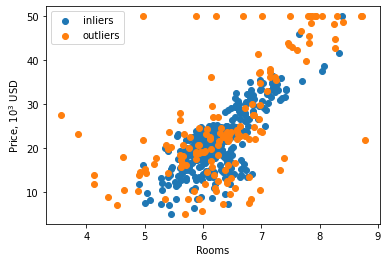

In [28]:
plt.scatter(inliers.rooms, inliers.price, label = "inliers")
plt.scatter(outliers.rooms, outliers.price, label = "outliers")
plt.xlabel("Rooms")
plt.ylabel("Price, $10^3$ USD")
plt.legend()
plt.show()

In [29]:
# Резултатът е по-нисък защото се тренира върху по-малко данни и има bias
ransac.score(housing_attributes_scaled, housing_prices)

0.7058151679355403

In [30]:
ransac.score(housing_attributes_scaled[ransac.inlier_mask_], housing_prices[ransac.inlier_mask_])

0.9286054256682078

In [31]:
ransac.score(housing_attributes_scaled[~ransac.inlier_mask_], housing_prices[~ransac.inlier_mask_])

0.5416443057529439

In [32]:
# see ransac plane detection 2d

In [33]:
#Polynomial Regression
polynomial_features = PolynomialFeatures(degree = 3, interaction_only = False)

In [39]:
housing_attributes_scaled_cubed = polynomial_features.fit_transform(housing_attributes_scaled)

In [40]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(housing_attributes_scaled_cubed, housing_prices)

LinearRegression()

In [41]:
polynomial_regression.score(housing_attributes_scaled_cubed, housing_prices)

0.9990091789657313

In [ ]:
# curse of dimensionality - колкото повече променливи имаме толкова по-трудно става да видим истински зависимости в тях 
# и толкова полесно става да видим случайни корелации в тях

In [ ]:
# Logistic regression

In [46]:
iris_data = pd.read_csv("data/iris.data", header = None)
iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "iris_type"]
iris_data

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
iris_attributes = iris_data.drop(columns = ["iris_type"])
iris_types = iris_data.iris_type

In [50]:
scaler = MinMaxScaler()
iris_attributes_scaled = scaler.fit_transform(iris_attributes)

In [54]:
logistic_regression = LogisticRegression(C = 1e9)

In [55]:
logistic_regression.fit(iris_attributes_scaled, iris_types)

LogisticRegression(C=1000000000.0)

In [56]:
logistic_regression.coef_

array([[-18.29679129,  29.19813694, -37.89417388, -38.3219437 ],
       [ 13.58611302,  -6.58018128,  -8.87560643,  -2.78717031],
       [  4.71067827, -22.61795566,  46.76978031,  41.10911401]])

In [ ]:
# One vs rest
# is this a setosa? -> 0, 1
# ......... verginica? -> 0, 1
# ......... versicolor -> 0, 1

In [57]:
logistic_regression.predict(iris_attributes_scaled)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [58]:
logistic_regression.score(iris_attributes_scaled, iris_types)

0.9866666666666667

In [59]:
logistic_regression.predict_proba(iris_attributes_scaled[:10]) # probabilyties

array([[1.00000000e+00, 1.02292805e-10, 1.55808686e-37],
       [9.99999970e-01, 3.00429452e-08, 2.11688322e-33],
       [1.00000000e+00, 1.58498332e-10, 1.87108297e-36],
       [9.99999999e-01, 7.76309552e-10, 1.50865607e-34],
       [1.00000000e+00, 9.50140661e-12, 9.49275281e-39],
       [1.00000000e+00, 3.16855709e-10, 1.04473560e-35],
       [1.00000000e+00, 2.38321856e-11, 1.51289189e-36],
       [1.00000000e+00, 3.06373975e-10, 2.99146537e-36],
       [9.99999998e-01, 1.59234854e-09, 7.50862174e-34],
       [9.99999997e-01, 2.51705408e-09, 3.74891346e-35]])

In [60]:
logistic_regression = LogisticRegression(C = 1e-9)
logistic_regression.fit(iris_attributes_scaled, iris_types)
logistic_regression.score(iris_attributes_scaled, iris_types)

0.35333333333333333

In [74]:
#композиране на estimators
#може да се вкарва Pipeline В Pipeline
log_reg_pipeline = Pipeline([
    ("square_features", PolynomialFeatures(degree = 1, interaction_only = False)),
    ("min_max_scaler", MinMaxScaler()),
    ("logistic_regression", LogisticRegression(C = 10))
], verbose = True)

In [75]:
log_reg_pipeline.fit(iris_attributes, iris_types)

[Pipeline] ... (step 1 of 3) Processing square_features, total=   0.0s
[Pipeline] .... (step 2 of 3) Processing min_max_scaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logistic_regression, total=   0.0s


Pipeline(steps=[('square_features', PolynomialFeatures(degree=1)),
                ('min_max_scaler', MinMaxScaler()),
                ('logistic_regression', LogisticRegression(C=10))],
         verbose=True)

In [76]:
log_reg_pipeline.steps

[('square_features', PolynomialFeatures(degree=1)),
 ('min_max_scaler', MinMaxScaler()),
 ('logistic_regression', LogisticRegression(C=10))]

In [77]:
log_reg_pipeline.score(iris_attributes, iris_types)

0.96